<a href="https://colab.research.google.com/github/ParthSharma1197/EDA-CAPSTONE-AIRBNB/blob/main/PARTH_SHARMA_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>


### **EXPLORATORY DATA ANALYSIS**
EDA or Exploratory Data Analysis is the critical process of performing the initial investgation on the data to find the 
anamolies in our data and shape it such that it is useful for taking some insights to sole our purpose.
There are certain step that we follow initially we will clean our data and make it free from anamolies such as Nan values,missing values and such values that could hinder the accuacy of  our analysis.



First, we will mount the drive and  import all the python libraries that are required throughout the course of our analysis, which include NumPy for numerical calculations and scientific computing, Pandas for cleaning,performing required actions on the dataset, and Matplotlib and Seaborn that will be used for visualization.

In [1]:
# mounting the drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing the libraries required for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


We will now load the data into the colab envirnoment and perform some actions to study and clean our data.

In [3]:
#importing the dataset in our colab envirnoment
working_dir_path ="/content/drive/MyDrive/Colab Notebooks/capstone project/Airbnb NYC 2019.csv"
airbnb_df=pd.read_csv(working_dir_path)

In [4]:
# Just for having the basic overview of our dataset showing only fist 5 rows.
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
# Same with the tail function showing last 5 rows of the dataset
airbnb_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [7]:
#Just having a look at input features to analyse which of them are relevant for our analysis.
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
# Just observing the dimensions of the data.
airbnb_df.shape

(48895, 16)

In [8]:
#Just thought of having a concise descriptive summary of my dataset.
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [9]:
#Just thought of having a concise summary of my dataset.
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## **Note**:

##### 1. From the above the summary i can asses that the dataset has null or missing values in  some input feature  and  need to decide whether to drop the whole column or impute some value such as 0 or average  in those null column based on the requirement of  further analysis

##### 2. For that i need the exact count of null values present in each column that is done below.
##### 3.We must check for duplicate values but since in this data set the repeating  entries makes relevance therefore we will not be removing any duplicate values.

In [10]:
#Checking for the null values in each input feature
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

*  ## **From our purpose of solving the problem i decided drop the id,last_review**


1.As id belong to the an indiviual and that doesnot affect the scope of our analysis that is why it can be dropped.

2.Review as last review is the date data type column and that does not add much significance to our purpose of data aalysis       therefore dropping the last review  date.

### **NOTE:**
1.Even if these column did not have any null value these columns are worth being dropped on the parameter of relevance to our analysis in order to make it concise and easy to study further.

In [11]:
#dropping columns that are not significant or could be of least use for our future data exploration

airbnb_df.drop(['id','last_review'], axis=1, inplace=True)

In [12]:
#having a look at my dataset after a small step of dataset cleaning.
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  reviews_per_month               38843 non-null  float64
 12  calculated_host_listings_count  

* We have cleaned our data to much extend but the input feature that are required and containes  the null values,we need to just impute certain values to that.

In [13]:
#imputing zero in place of nan values on the reviews_per_month.
airbnb_df.reviews_per_month=airbnb_df.reviews_per_month.replace(np.nan,0)

In [14]:
# looking at the dataset after the changes made.
airbnb_df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [15]:
# just a small check for null values after few steps of data cleaning 
airbnb_df.isna().sum()

name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

* ### Looking at the above stats shown it is visible that there are some missing values present in the name column and since these are approximately 0.0327 % of the total so it will be wise to drop those particular rows off the dataset

In [16]:
#dropping the rows containg the null or missing values
airbnb_df=airbnb_df.dropna()

In [17]:
airbnb_df.isna().sum()

name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

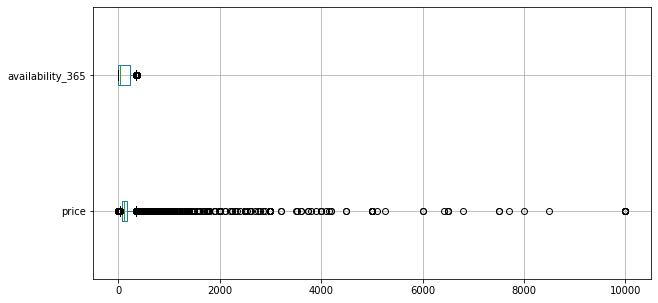

In [18]:
# Let's check for the Outliers in price and availablity_365 column of the dataset
airbnb_df.boxplot(column=['price','availability_365'], figsize=(10,5), whis=[5,95],vert=False)
plt.show()

Looking at the box plot to check for outliers we can see that the data for price is heavily skewed towards the right therefore for price column we will be using mean value and 
since the availablity_365 is less skewed hence will be using mean value in the further analysis. 

* ### Now looking at the above the result it  can be said  that there are no null values present in our data as we have dropped the columns that are of least significant or containing the null values  and rows that contain the missing value.





* #### After cleaning the data just having a look at the dataset to have some 

insight of other factors also.

* #### Let's look at some of the categorical columns that are useful in our analysis.

In [19]:
#we can here see the different neighbourhood group
different_ngroups=airbnb_df.neighbourhood_group.unique()
different_ngroups

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [20]:
# We can have look over how the airbnb transaction is distributed over the neighbourhood_group
neighbourhood_group_dist=airbnb_df["neighbourhood_group"].value_counts()
neighbourhood_group_dist

Manhattan        21643
Brooklyn         20089
Queens            5664
Bronx             1089
Staten Island      373
Name: neighbourhood_group, dtype: int64

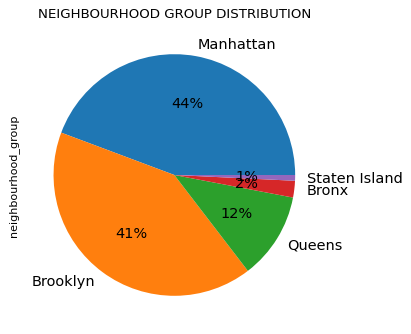

In [21]:
# To see the distribution we choose pie plot 
fig = plt.figure(figsize=(5,5), dpi=80)
neighbourhood_group_dist.plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)
plt.title('NEIGHBOURHOOD GROUP DISTRIBUTION')
plt.axis()
plt.show()

Manhattan is the city where most Airbnb 44% of overall airbnb in NYC. 

In [22]:
## checking for unique room type in dataframe
room_type=airbnb_df.room_type.unique()
room_type

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [23]:
##looking for the distribution of different room type in overall dataset
room_type_dist=airbnb_df["room_type"].value_counts()
room_type_dist

Entire home/apt    25393
Private room       22306
Shared room         1159
Name: room_type, dtype: int64

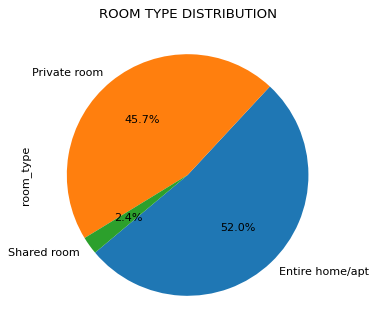

In [24]:
# Here we have some intresting observation where we can analys that what is the most preferred room type
fig = plt.figure(figsize=(5,5), dpi=80)
room_type_dist.plot(kind='pie',  autopct='%0.1f%%', startangle=220, fontsize=10)
plt.title('ROOM TYPE DISTRIBUTION')
plt.axis()
plt.show()

Here we have an intresting observation that almost 52% of people preferred Entire home/apt.

In [25]:
#looking at the top 5 hottest neighbourhood.
neighbourhood_df=airbnb_df['neighbourhood'].value_counts().iloc[:5]
neighbourhood_df

Williamsburg          3917
Bedford-Stuyvesant    3713
Harlem                2655
Bushwick              2462
Upper West Side       1969
Name: neighbourhood, dtype: int64

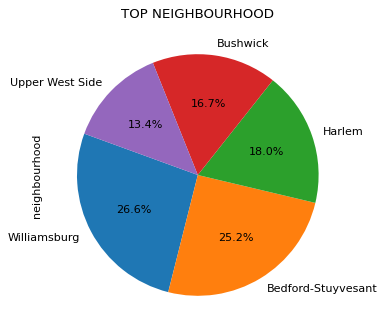

In [26]:
fig = plt.figure(figsize=(5,5), dpi=80)
neighbourhood_df.plot(kind='pie',  autopct='%0.1f%%', startangle=160, fontsize=10)
plt.title('TOP NEIGHBOURHOOD')
plt.show()

Hence, it is observable that Williamsburg is the hottest neighbouhood

In [27]:
# we can now have a look over to the top neighbourhoods average price/day of Airbnb listings
df_top=airbnb_df.groupby('neighbourhood')[['price']].median().sort_values(by='price',ascending=False).reset_index().head()


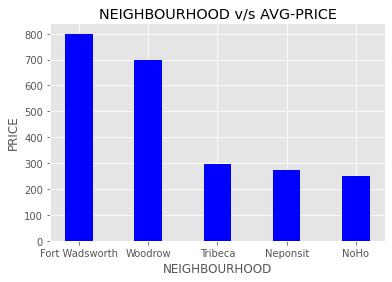

<Figure size 720x216 with 0 Axes>

In [28]:
# here we learn the trend that is followed by the above dataframe in the form of bar plot 
x = df_top['neighbourhood']
y = df_top['price']
plt.style.use('ggplot')

fig,ax=plt.subplots()

fig = plt.figure(figsize = (10, 3))

# creating the bar plot
ax.bar(x,y, color ='blue',
width = 0.4)

ax.set_xlabel('NEIGHBOURHOOD')
ax.set_ylabel('PRICE')
ax.set_title('NEIGHBOURHOOD v/s AVG-PRICE')

plt.show()

Hence, it is clearly visible that Fort Wadsworth tops in the average price/day in the neighbourhood listing

In [29]:
# Here we can also find that Fort Wadsworth belongs to which neighbourhood group
airbnb_df[['neighbourhood_group','neighbourhood']][airbnb_df['neighbourhood']=="Fort Wadsworth"]

,neighbourhood_group,neighbourhood
25386,Staten Island,Fort Wadsworth


In [30]:
# We can get to analyse the data on the basis of minimun average price/day in the neighbourhood listing.
df_min=airbnb_df.groupby('neighbourhood')[['price']].median().sort_values(by='price',ascending=True).reset_index().head()

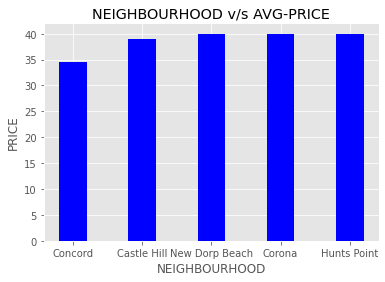

<Figure size 720x216 with 0 Axes>

In [31]:
#Plotting the graph to visualise the trend
x = df_min['neighbourhood']
y = df_min['price']
plt.style.use('ggplot')

fig,ax=plt.subplots()

fig = plt.figure(figsize = (10, 3))

# creating the bar plot
ax.bar(x,y, color ='blue',
width = 0.4)

ax.set_xlabel('NEIGHBOURHOOD')
ax.set_ylabel('PRICE')
ax.set_title('NEIGHBOURHOOD v/s AVG-PRICE')

plt.show()

Hence, it is clearly visible that Concord  has the least average price/day in the neighbourhood listing

In [32]:
# Here we can also find that Concord belongs to which neighbourhood group
airbnb_df[['neighbourhood_group','neighbourhood']][airbnb_df['neighbourhood']=="Concord"].head(1)

,neighbourhood_group,neighbourhood
1557,Staten Island,Concord


In [ ]:
# We need know which neighbourhood group is expensive for each room type
room_type_df=airbnb_df.groupby(['neighbourhood_group','room_type'])[['price']].median().sort_values(by='price',ascending=False).reset_index()

In [33]:
# Creating a dataframe  Room_types vs price on different neighbourhood groups.
room_type_df=airbnb_df.groupby(['room_type','neighbourhood_group'])[['price']].median().sort_values(by='price',ascending=False).reset_index()
room_type_df

,room_type,neighbourhood_group,price
0,Entire home/apt,Manhattan,191.0
1,Entire home/apt,Brooklyn,145.0
2,Entire home/apt,Queens,120.0
3,Entire home/apt,Bronx,100.0
4,Entire home/apt,Staten Island,100.0
5,Private room,Manhattan,90.0
6,Shared room,Manhattan,69.0
7,Private room,Brooklyn,65.0
8,Private room,Queens,60.0
9,Private room,Bronx,53.5


We already know  that there are three type of rooms "Entire home/apt","Private room","Shared room".Therefor dividing our dataset into three subsets to study the variation separately.

In [34]:
# Now we will create three sub dataframes for each room type to have a clear insight .
room_type_df1=room_type_df[['neighbourhood_group','room_type','price']][room_type_df['room_type']=="Entire home/apt"]
room_type_df2=room_type_df[['neighbourhood_group','room_type','price']][room_type_df['room_type']=="Private room"]
room_type_df3=room_type_df[['neighbourhood_group','room_type','price']][room_type_df['room_type']=="Shared room"]

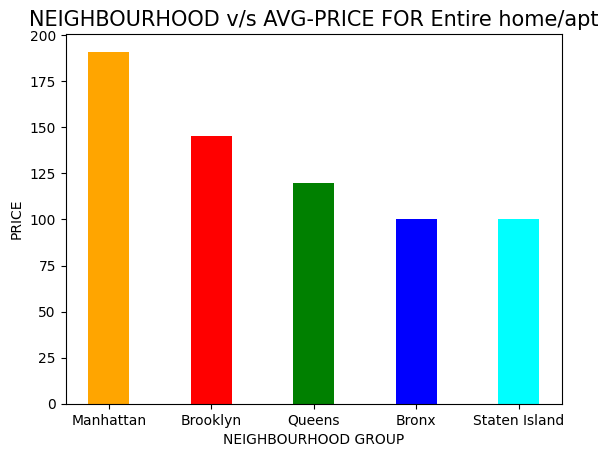

<Figure size 1000x600 with 0 Axes>

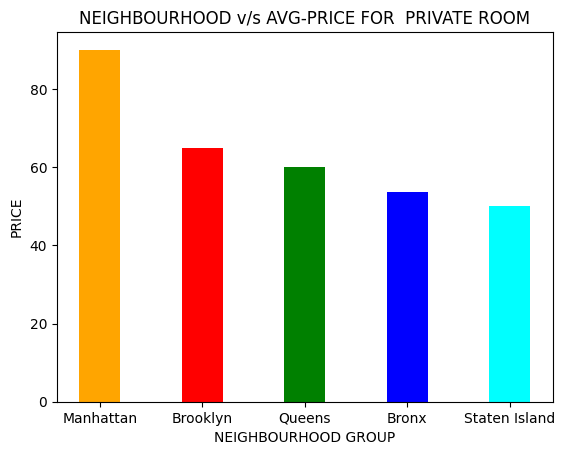

<Figure size 1000x600 with 0 Axes>

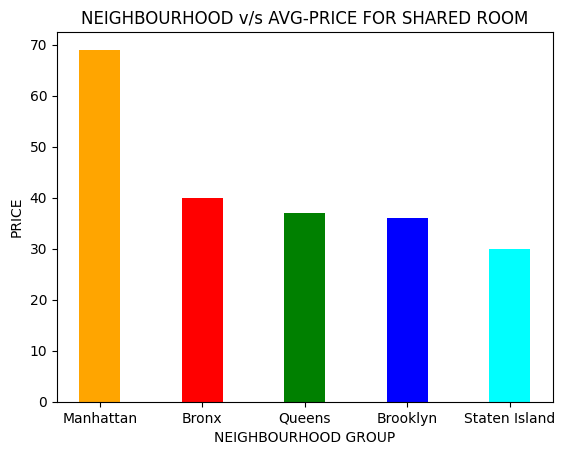

<Figure size 1000x600 with 0 Axes>

In [35]:
#plotting the relaionship between 'neighbourhood_group','room_type','price' where roomtype is "Entire home/apt".
x = room_type_df1['neighbourhood_group']
y = room_type_df1['price']



plt.style.use('default')

fig,ax=plt.subplots()


fig = plt.figure(figsize = (10, 6))

# creating the bar plot
ax.bar(x,y, color =['orange', 'red', 'green', 'blue', 'cyan'],width = 0.4)

ax.set_xlabel('NEIGHBOURHOOD GROUP')
ax.set_ylabel('PRICE')
ax.set_title('NEIGHBOURHOOD v/s AVG-PRICE FOR Entire home/apt', fontsize=15,
          color="black")


plt.show()

a = room_type_df2['neighbourhood_group']
b = room_type_df2['price']

plt.style.use("default")

fig,ax=plt.subplots()


fig = plt.figure(figsize = (10, 6))

# creating the bar plot
ax.bar(a,b, color =['orange', 'red', 'green', 'blue', 'cyan'],width = 0.4)

ax.set_xlabel('NEIGHBOURHOOD GROUP')
ax.set_ylabel('PRICE')
ax.set_title('NEIGHBOURHOOD v/s AVG-PRICE FOR  PRIVATE ROOM')

plt.show()

c = room_type_df3['neighbourhood_group']
d = room_type_df3['price']

plt.style.use("default")

fig,ax=plt.subplots()


fig = plt.figure(figsize = (10, 6))

# creating the bar plot
ax.bar(c,d, color =['orange', 'red', 'green', 'blue', 'cyan'],width = 0.4)

ax.set_xlabel('NEIGHBOURHOOD GROUP')
ax.set_ylabel('PRICE')
ax.set_title('NEIGHBOURHOOD v/s AVG-PRICE FOR SHARED ROOM')

plt.show()

Hence we can conclude that out of all the neighbourhood groups 'MANHATTAN' is the most expensive across all the three room types

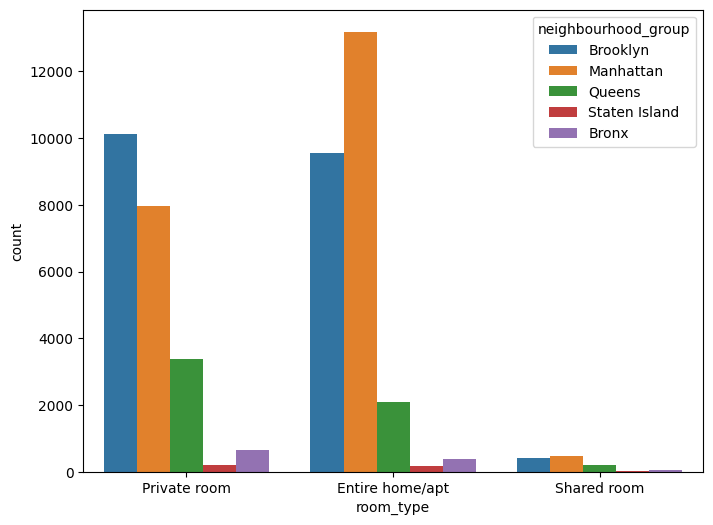

In [36]:
#room type used by people the most
plt.figure(figsize=(8,6))
sns.countplot(data =airbnb_df, x = 'room_type', hue = 'neighbourhood_group')

Hence,we can say that Entire home/apt is most used by people in Manhattan, whereas in Brooklyn Private room are for most preferred

In [37]:
# We need to examine that how many nights people stay in each room type:
average_nights_df=airbnb_df.groupby(['room_type'])[['minimum_nights']].mean().reset_index()

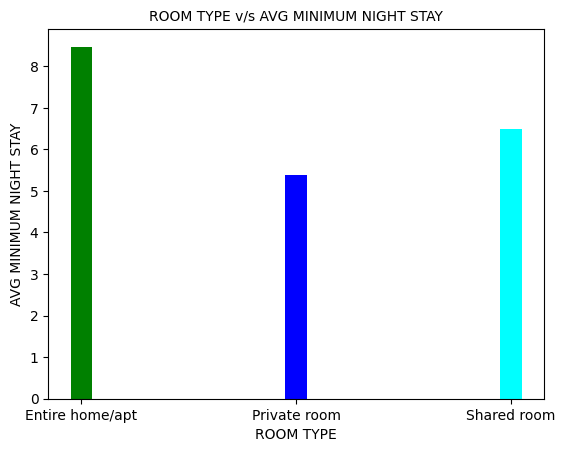

<Figure size 0.393701x0.393701 with 0 Axes>

In [38]:
x = average_nights_df['room_type']
y = average_nights_df['minimum_nights']

plt.style.use('default')

fig,ax=plt.subplots()

cm = 1/2.54
fig = plt.figure(figsize = (0.01*cm,0.01*cm))

# creating the bar plot
ax.bar(x,y, color =[ 'green', 'blue', 'cyan'],width=0.1)

ax.set_xlabel('ROOM TYPE')
ax.set_ylabel('AVG MINIMUM NIGHT STAY')
ax.set_title('ROOM TYPE v/s AVG MINIMUM NIGHT STAY', fontsize=10,
          color="black")


plt.show()

Here we have a very intresting conclusion that the people preffered 'Entire home/apt' out of all the room types i.e the average minimum stay for the customer in Entire home/apt is around 8. 

In [39]:
#We can also look for minimum night stay in airbnb
airbnb_df['minimum_nights'].value_counts()

1      12700
2      11694
3       7996
30      3759
4       3297
       ...  
186        1
366        1
87         1
183        1
36         1
Name: minimum_nights, Length: 108, dtype: int64

Text(0.5, 1.0, 'MINIMUM NUMBER OF NIGHTS CUSTOMER STAYED IN AIRBNB')

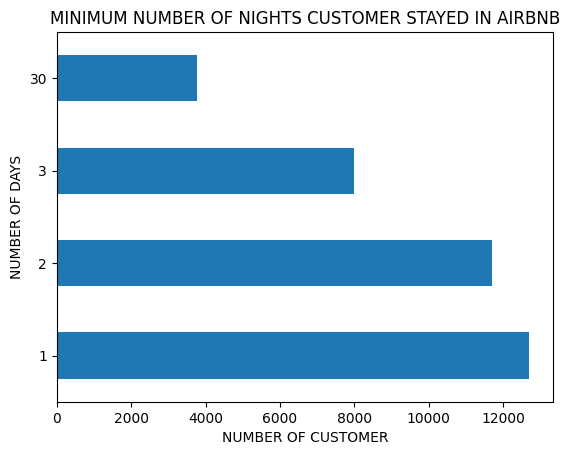

In [40]:
#plot for the above case
airbnb_df['minimum_nights'].value_counts().iloc[:4].plot(kind = 'barh')
plt.xlabel("NUMBER OF CUSTOMER")
plt.ylabel("NUMBER OF DAYS")
plt.title("MINIMUM NUMBER OF NIGHTS CUSTOMER STAYED IN AIRBNB")

We can see that almost 12500 people stayed in airbnb for just one day
and almost 3800 people used it for 1 month.

In [41]:
# it will be intresting to see which neighbourhood will get the maximum number of reviews per month
monthly_reviews_df=airbnb_df.groupby(['neighbourhood_group'])[['reviews_per_month']].max().reset_index()


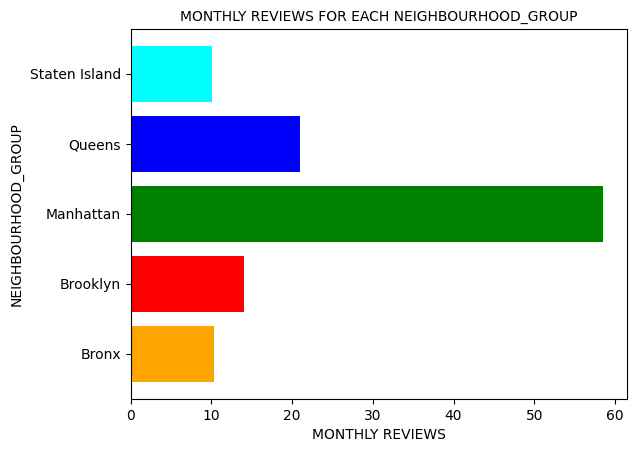

<Figure size 0.393701x0.393701 with 0 Axes>

In [42]:
x = monthly_reviews_df['neighbourhood_group']
y = monthly_reviews_df['reviews_per_month']



plt.style.use('default')

fig,ax=plt.subplots()

cm = 1/2.54
fig = plt.figure(figsize = (0.01*cm,0.01*cm))

# creating the bar plot
ax.barh(x,y,color =['orange', 'red', 'green', 'blue', 'cyan'])

ax.set_xlabel('MONTHLY REVIEWS')
ax.set_ylabel('NEIGHBOURHOOD_GROUP')
ax.set_title('MONTHLY REVIEWS FOR EACH NEIGHBOURHOOD_GROUP', fontsize=10,
          color="black")


plt.show()

Hence, we can say that the maximum reviews per month out of all the neighbourhood groups has been given to the 'Manhattan'.
Also from the above plot we can have get the name of the top reviewd host in 'Manhattan'.

In [43]:
#finding the host most reviewed per month  :
airbnb_df[['host_id','host_name','neighbourhood_group','reviews_per_month']][airbnb_df['reviews_per_month']==airbnb_df['reviews_per_month'].max()]

,host_id,host_name,neighbourhood_group,reviews_per_month
42075,244361589,Row NYC,Manhattan,58.5


In [44]:
#finding the host least reviewed per month :
airbnb_df[['host_id','host_name','neighbourhood_group','reviews_per_month']][airbnb_df['reviews_per_month']==1].head()

,host_id,host_name,neighbourhood_group,reviews_per_month
206,256161,Wayne,Manhattan,1.0
519,179020,Michael,Manhattan,1.0
1053,2177462,Marc,Brooklyn,1.0
2070,4983320,Terri,Queens,1.0
2510,6602545,Eleni,Brooklyn,1.0


Therefore we can say that ROW NYC in Manhattan has got the maximum reviews per month.

Text(0.5, 1.0, 'NEIGHBOURHOOD GROUP WITH MOST REVIEWS')

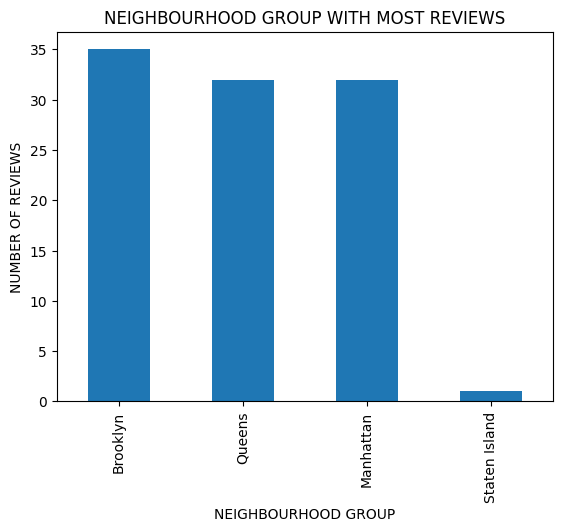

In [45]:
# Rooms with top 100  number of reviews reviews by neighbourhood
df_reviews_100=airbnb_df.sort_values(by=['number_of_reviews'],ascending=False).head(100)
df_reviews_100['neighbourhood_group'].value_counts().plot(kind = 'bar')
plt.xlabel('NEIGHBOURHOOD GROUP')
plt.ylabel('NUMBER OF REVIEWS')
plt.title('NEIGHBOURHOOD GROUP WITH MOST REVIEWS')

In [46]:
# Room_types and their availability in different neighbourhood groups
availablity_df=airbnb_df[['neighbourhood_group','availability_365']]
availablity_df

,neighbourhood_group,availability_365
0,Brooklyn,365
1,Manhattan,355
2,Manhattan,365
3,Brooklyn,194
4,Manhattan,0
...,...,...
48890,Brooklyn,9
48891,Brooklyn,36
48892,Manhattan,27
48893,Manhattan,2


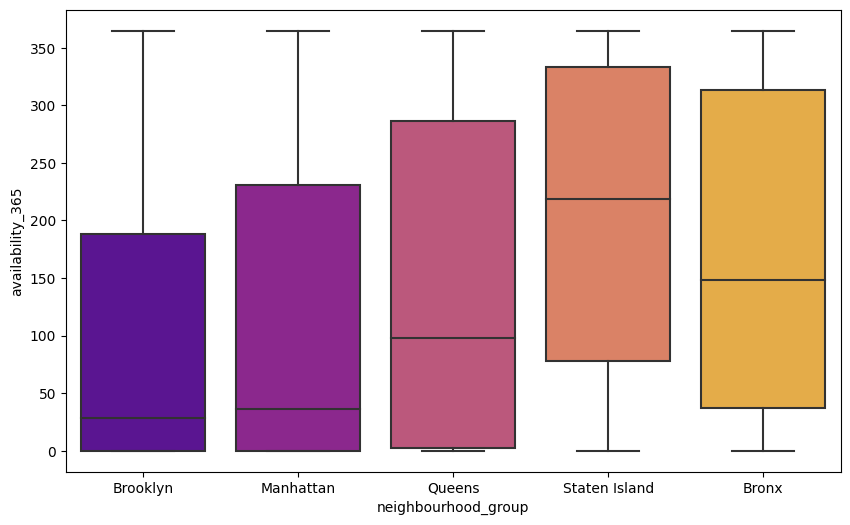

In [47]:
#plot the aove relation
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=availablity_df, x='neighbourhood_group',y='availability_365',palette='plasma')

In [48]:
#looking at the airbnb across different neighbouhood groups
airbnb_df['neighbourhood_group'].value_counts()

Manhattan        21643
Brooklyn         20089
Queens            5664
Bronx             1089
Staten Island      373
Name: neighbourhood_group, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


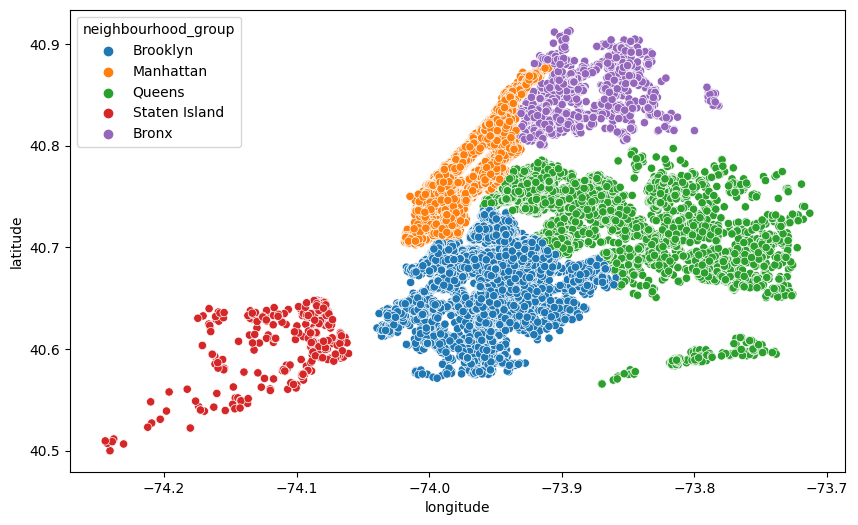

In [49]:
#plot to show the distribution on the longitude vs latitude  map
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb_df['longitude'],airbnb_df['latitude'],hue=airbnb_df['neighbourhood_group'])

In [50]:
# Again looking at the room types counts.
room_type_dist

Entire home/apt    25393
Private room       22306
Shared room         1159
Name: room_type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


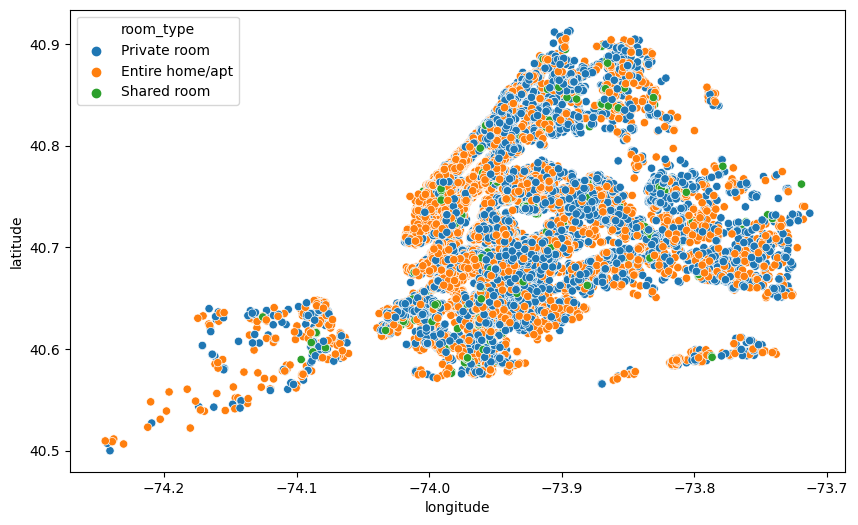

In [51]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb_df.longitude,airbnb_df.latitude,hue=airbnb_df.room_type)

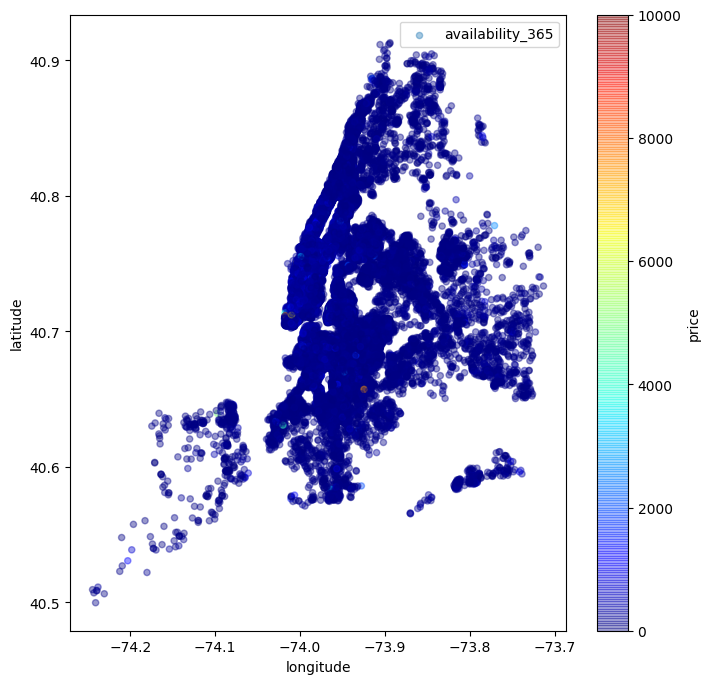

In [53]:
#Let's now availablity of the airbnb on map to have good visualisation.
df_availablity=airbnb_df.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(8,8))
df_availablity.legend()